#1. Thêm thư viện

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Convolution2D, MaxPooling2D, Flatten
from tensorflow.keras import utils
import tensorflow as tf
from tensorflow import keras


In [2]:
path = "D:/TGMT/UngDungNhanDangHangXe_/Class/" #đường dẫn đên hình ảnh
categories = ['Audi', 'Mercedes', 'Hyundai', 'Lexus', 'Mazda', 'Toyota', 'Volkswagen','Opel']

In [3]:
# TIỀN XỬ LÝ DỮ LIỆU

#Đọc từng tấm hình và chuyển về cùng kích thước
data = []
labels =[]
imagePaths = []

HEIGHT = 128
WIDTH = 128

N_CHANNELS = 3


for k, category in enumerate(categories):
  for f in os.listdir(path+category):
    imagePaths.append([path+category+'/'+f,k])

#Xáo trộn dữ liệu
import random
random.shuffle(imagePaths)
print(imagePaths[:10])

for imagePath in imagePaths:
  image = cv2.imread(imagePath[0])
  image = cv2.resize(image, (WIDTH, HEIGHT))
  data.append(image)

  label = imagePath[1]
  labels.append(label)

[['D:/TGMT/UngDungNhanDangHangXe_/Class/Mazda/DMAAAgOoGuA-1920_rotate_90_153.jpg', 4], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Volkswagen/images220.jpg', 6], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Lexus/images60_rotate_180_236.jpg', 3], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Mercedes/mercede (74).jpg', 1], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Mercedes/mercede (327).jpg', 1], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Toyota/images301_rotate_180_175.jpg', 5], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Volkswagen/images263_rotate_90_151.jpg', 6], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Mercedes/mercede (704).jpg', 1], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Opel/images116_rotate_180_65.jpg', 7], ['D:/TGMT/UngDungNhanDangHangXe_/Class/Volkswagen/vw18_rotate_90_279.jpg', 6]]


In [4]:
#Chuẩn hóa dữ liệu và chuyển đổi chúng thành dạng mảng numpy

data = np.array(data, dtype="float32") / 255
labels = np.array(labels)

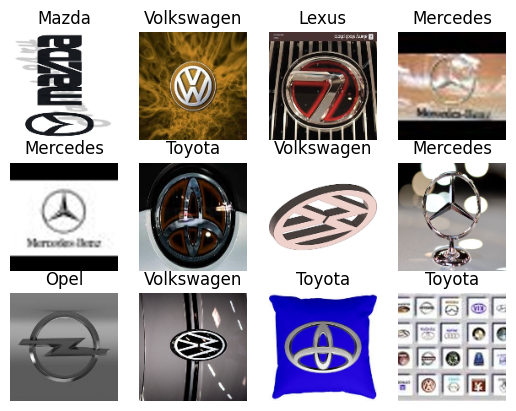

In [5]:

plt.subplots(3,4)
for i in range(12):
  plt.subplot(3,4,i+1)
  plt.imshow(data[i])
  plt.axis('off')
  plt.title(categories[labels[i]])
plt.show()

In [6]:
#CHIA TẬP HUẤN LUYỆN
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2, random_state=42)

In [7]:
#TIEN XU LY LOP

trainY = utils.to_categorical(trainY, 8)

print(trainX.shape)
print(testX.shape)
print(trainY.shape)
print(testY.shape)

(5903, 128, 128, 3)
(1476, 128, 128, 3)
(5903, 8)
(1476,)


In [8]:
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.models import Sequential

EPOCHS = 35
INIT_LR = 1e-3
BS = 80
class_name = categories

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(HEIGHT, WIDTH, N_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(class_name), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 flatten (Flatten)           (None, 127008)            0         
                                                                 
 dense (Dense)               (None, 128)               16257152  
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                     

In [9]:
#HUAN LUYEN MO HINH
model.fit(trainX, trainY, batch_size= BS, epochs=EPOCHS, verbose=1)

Epoch 1/35


74/74 [==============================] - 38s 486ms/step - loss: 3.0113 - accuracy: 0.1930
Epoch 2/35
74/74 [==============================] - 40s 547ms/step - loss: 1.8898 - accuracy: 0.2309
Epoch 3/35
74/74 [==============================] - 43s 585ms/step - loss: 1.7937 - accuracy: 0.2509
Epoch 4/35
74/74 [==============================] - 40s 544ms/step - loss: 1.7061 - accuracy: 0.3012
Epoch 5/35
74/74 [==============================] - 37s 501ms/step - loss: 1.6170 - accuracy: 0.3270
Epoch 6/35
74/74 [==============================] - 37s 505ms/step - loss: 1.5383 - accuracy: 0.3757
Epoch 7/35
74/74 [==============================] - 43s 577ms/step - loss: 1.4516 - accuracy: 0.4164
Epoch 8/35
74/74 [==============================] - 41s 557ms/step - loss: 1.3834 - accuracy: 0.4508
Epoch 9/35
74/74 [==============================] - 41s 554ms/step - loss: 1.2976 - accuracy: 0.4965
Epoch 10/35
74/74 [==============================] - 44s 597ms/step - loss: 1.2461 - accu

47/47 [==============================] - 2s 40ms/step


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2032\924252792.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['']+ categories)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2032\924252792.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['']+ categories)


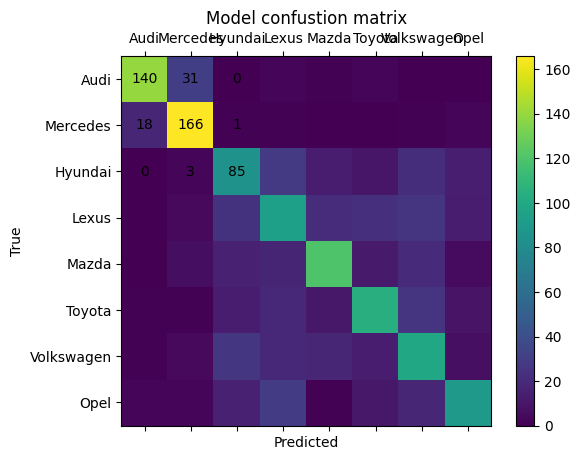

Accuracy: 60.77%


In [10]:
# Tính toán chỉ số đánh giá

from numpy import argmax
from sklearn.metrics import confusion_matrix, accuracy_score

pred = model.predict(testX)
predictions = argmax(pred, axis=1)

cm = confusion_matrix(testY, predictions)

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Model confustion matrix')
fig.colorbar(cax)
ax.set_xticklabels(['']+ categories)
ax.set_yticklabels(['']+ categories)

for i in range(3):
  for j in range(3):
    ax.text(i,j,cm[j,i], va='center', ha='center')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


accuracy = accuracy_score(testY, predictions)
print("Accuracy: %.2f%%" %(accuracy*100.0))

1/1 [==============================] - 0s 34ms/step
[[0. 0. 0. 1. 0. 0. 0. 0.]]


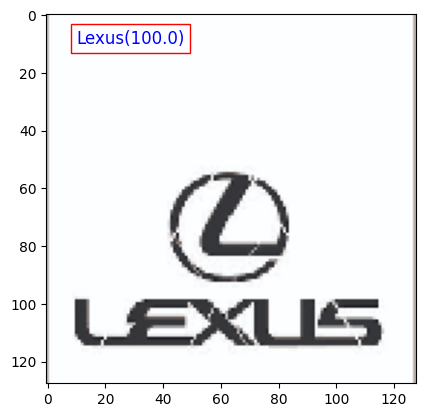

Lexus 100.0


In [14]:
#Kiểm tra kết quả
from tensorflow.keras.applications.vgg16 import preprocess_input
import PIL
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


img_path = "D:/TGMT/UngDungNhanDangHangXe_/Test/lexus/images317.jpg"

img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = preprocess_input(img_batch)

pred = model.predict(img_preprocessed)
Res = np.argmax(pred, axis=1)
print(pred)

Result_Text = '{0}({1})'.format(categories[Res[0]], round(pred[0][Res[0]] * 100, 2))

plt.text(10, 10, Result_Text, color="blue", fontsize="large", bbox=dict(fill=False, edgecolor='red', linewidth=1))
plt.imshow(img)
plt.show()
print(categories[Res[0]], pred[0][Res[0]] * 100)